In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("flights")
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [4]:
df['yearMonth'] = "01-"+df['month'].astype(str)+"-"+df['year'].astype(str)
df['yearMonth'] = pd.to_datetime("01-"+df['month'].astype(str)+"-"+df['year'].astype(str))
df.set_index('yearMonth',inplace=True)

In [8]:
# create columns fro one month and oneyear lagged
airP = df[['passengers']].copy(deep=True)
airP['firstDiff']=airP['passengers'].diff()
airP['Diff12']=airP['passengers'].diff(12) #This will be used later in SARIMAX

airP.head(24)

,passengers,firstDiff,Diff12
yearMonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN
1949-06-01,135,14.0,NaN
1949-07-01,148,13.0,NaN
1949-08-01,148,0.0,NaN
1949-09-01,136,-12.0,NaN


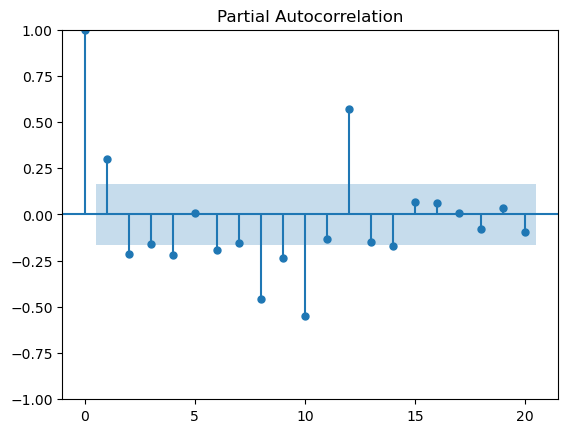

In [10]:
# Now ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

plot_pacf(airP['firstDiff'].dropna(),lags=20)
plt.show()

#shaded area is insignificant area
#PACF gives us the auto regressive values
# First p is 1,whose value is 0.31
#So teh significant p values are 1,2,4,6,etc

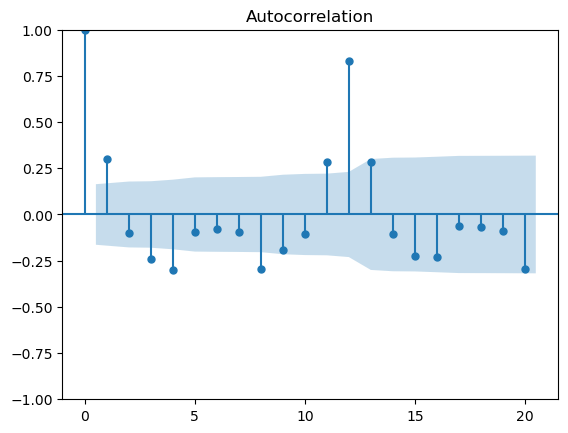

In [12]:
# NOw let us take this value as p and find q,for which we need ACF
plot_acf(airP['firstDiff'].dropna(),lags=20)
plt.show()